In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | emba
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | lagoa
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kenai
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | la palma
Processing Record 8 of Set 1 | wasilla
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | doha
Processing Record 11 of Set 1 | sakakah
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | astana
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | ayagoz
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | caravelas
Processing Record 20 of Set 1 | aquin
Processing Record 21 of Set 1 | zhangjiakou
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | atuona
Processing Record 24 o

Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | stornoway
Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | havoysund
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | kodyma
Processing Record 43 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 4 | aksu
Processing Record 45 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | noshiro
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | cockburn town
Processing Record 50 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 1 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 2 of Set 5 | mayor pablo lagerenza
Processing Record 3 of Set 5 | nan
Processing Record 4 of Set 5 | kawana waters
City not found. Skipping...
Processing Record 5 of Set 5 | cabedelo
Processing Record 6 of Set 5 | morales
Processing Record 7

Processing Record 25 of Set 8 | jamame
Processing Record 26 of Set 8 | asau
Processing Record 27 of Set 8 | tawkar
City not found. Skipping...
Processing Record 28 of Set 8 | salto
Processing Record 29 of Set 8 | umkomaas
Processing Record 30 of Set 8 | taltal
Processing Record 31 of Set 8 | smithers
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | siguiri
Processing Record 35 of Set 8 | sola
Processing Record 36 of Set 8 | blairmore
Processing Record 37 of Set 8 | pervomaysk
Processing Record 38 of Set 8 | forio
Processing Record 39 of Set 8 | riyadh
Processing Record 40 of Set 8 | mogadishu
Processing Record 41 of Set 8 | sabang
Processing Record 42 of Set 8 | ridgecrest
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | chernyanka
Processing Record 45 of Set 8 | longlac
City not found. Skipping...
Processing Record 46 of Set 8 | bitung
Processing Record 47 of Set 8 | awbari
Processing Record 48

Processing Record 15 of Set 12 | thinadhoo
Processing Record 16 of Set 12 | puerto escondido
Processing Record 17 of Set 12 | manadhoo
Processing Record 18 of Set 12 | flinders
Processing Record 19 of Set 12 | oussouye
Processing Record 20 of Set 12 | sungairaya
Processing Record 21 of Set 12 | kalmar
Processing Record 22 of Set 12 | mandalgovi
Processing Record 23 of Set 12 | nyagan
Processing Record 24 of Set 12 | ferry pass
Processing Record 25 of Set 12 | gizo
Processing Record 26 of Set 12 | langarud
Processing Record 27 of Set 12 | hobyo
Processing Record 28 of Set 12 | maxixe
Processing Record 29 of Set 12 | posse
Processing Record 30 of Set 12 | nishihara
Processing Record 31 of Set 12 | los andes
Processing Record 32 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 33 of Set 12 | maceio
Processing Record 34 of Set 12 | saleaula
City not found. Skipping...
Processing Record 35 of Set 12 | xinzhi
Processing Record 36 of Set 12 | san quintin
Processing Record 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Emba,48.83,58.14,94.50,13,68,6.40,KZ,2020-08-01 12:04:57
1,Cape Town,-33.93,18.42,70.00,55,0,9.17,ZA,2020-08-01 12:04:58
2,Lagoa,39.05,-27.98,69.84,69,21,8.61,PT,2020-08-01 12:04:58
3,Hermanus,-34.42,19.23,64.99,67,0,5.01,ZA,2020-08-01 12:04:58
4,Kenai,60.55,-151.26,57.20,87,90,3.36,US,2020-08-01 12:04:58
5,Ushuaia,-54.80,-68.30,41.00,80,75,7.31,AR,2020-08-01 12:04:58
6,La Palma,33.85,-118.05,66.20,72,1,2.15,US,2020-08-01 12:04:58
7,Wasilla,61.58,-149.44,55.40,93,90,0.92,US,2020-08-01 12:02:06
8,Mahebourg,-20.41,57.70,75.20,69,75,11.41,MU,2020-08-01 12:00:47
9,Doha,25.29,51.53,105.01,57,14,13.87,QA,2020-08-01 12:01:03


In [24]:
new_coloum_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",  "Wind Speed"]
city_data_df = city_data_df[new_coloum_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Emba,KZ,2020-08-01 12:04:57,48.83,58.14,94.50,13,68,6.40
1,Cape Town,ZA,2020-08-01 12:04:58,-33.93,18.42,70.00,55,0,9.17
2,Lagoa,PT,2020-08-01 12:04:58,39.05,-27.98,69.84,69,21,8.61
3,Hermanus,ZA,2020-08-01 12:04:58,-34.42,19.23,64.99,67,0,5.01
4,Kenai,US,2020-08-01 12:04:58,60.55,-151.26,57.20,87,90,3.36


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1596285253.268461

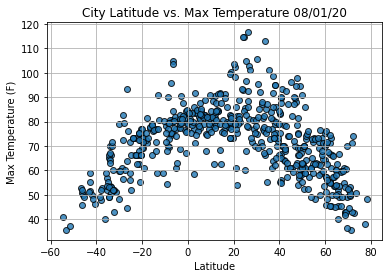

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

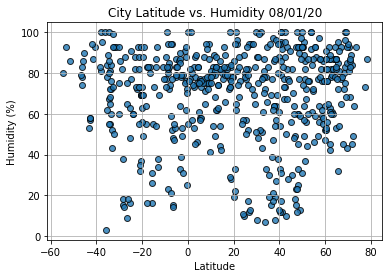

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

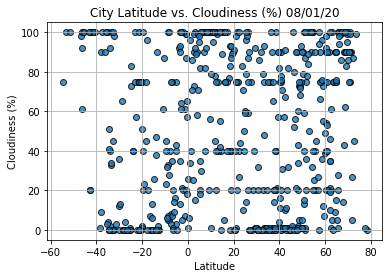

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

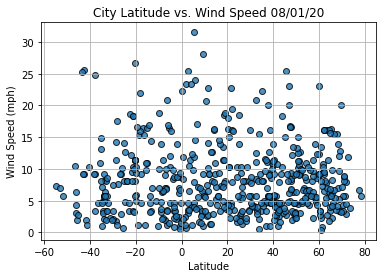

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()